CANTIDAD DE VACUNAS APLICADA POR TIPO DE VACUNA ASCENDENTEMENTE:
                            Vacunas  Cantidad
0                SINOPHARM COVID-19      2924
1                CORONAVAC COVID-19     31525
2                  COVAXIN COVID-19    194284
3                HAYAT VAX COVID-19    243270
4               MODERNA - COVID -19    359842
5                SPUTNIK V COVID-19    627063
6  ASTRAZENECA-CHADOX1-S - COVID-19    948941
7                PFIZER - COVID -19   2362980
    Date_reported   Country  New_cases
0      03/01/2020  Paraguay          0
1      04/01/2020  Paraguay          0
2      05/01/2020  Paraguay          0
3      06/01/2020  Paraguay          0
4      07/01/2020  Paraguay          0
..            ...       ...        ...
672    05/11/2021  Paraguay         52
673    06/11/2021  Paraguay         41
674    07/11/2021  Paraguay         50
675    08/11/2021  Paraguay         38
676    09/11/2021  Paraguay         48

[677 rows x 3 columns]
    Date_reported   Country  

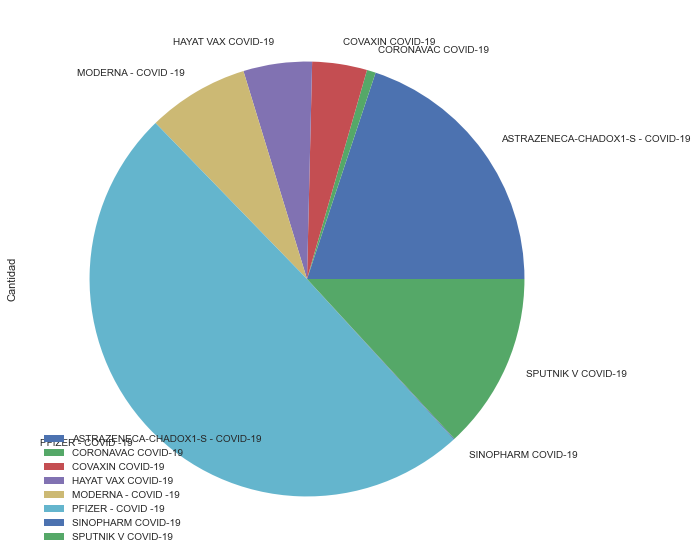

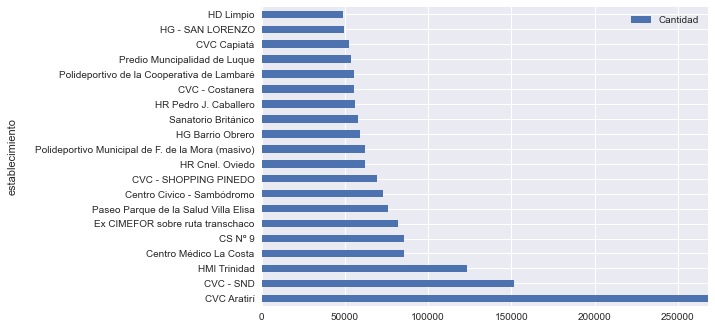

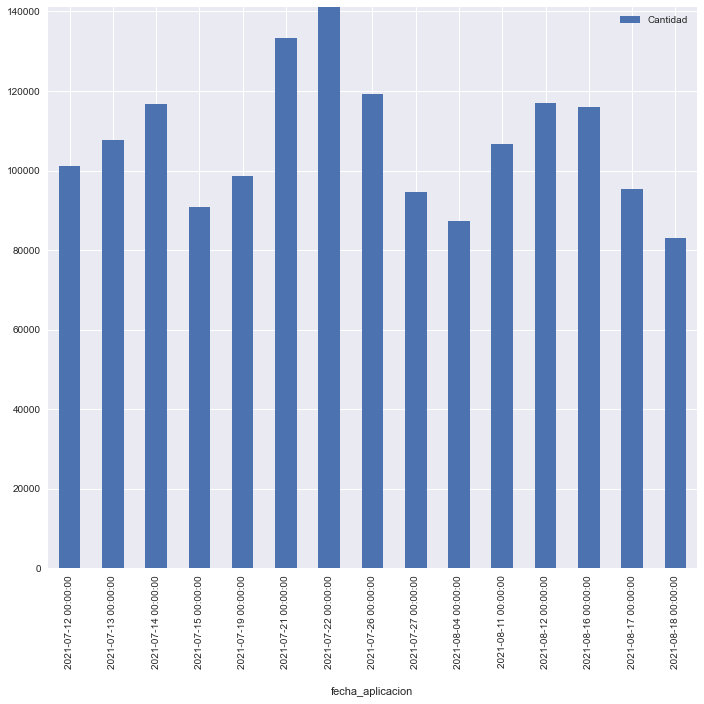

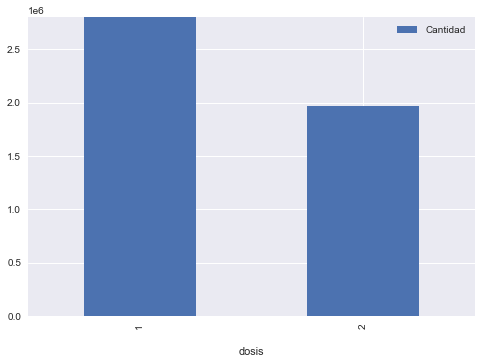

In [3]:
import pandas as pd 
import numpy as np
import perfplot
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import matplotlib.dates as dates


'''LECTURA DE DATOS'''
datos=pd.read_csv('C:/Users/jlezc/Documents/Tp ds/vacunados.csv',sep=';',warn_bad_lines=False,header=0);
descripcion=datos['descripcion_vacuna'].value_counts(ascending=True)

plt.style.use('seaborn')

''''IMPRESION DE VACUNAS APLICADAS '''
print("CANTIDAD DE VACUNAS APLICADA POR TIPO DE VACUNA ASCENDENTEMENTE:")
descripcion=descripcion.reset_index()
descripcion.rename(columns={'index': 'Vacunas', 'descripcion_vacuna': 'Cantidad'}, inplace=True)
print(descripcion)

'''DISTRIBUCION DE VACUNAS APLICADAS (PLOT)'''
descripcion.groupby(['Vacunas']).sum().plot(kind='pie', y='Cantidad', figsize=(10,10))

''' CANTIDAD DE VACUNADOS POR FECHA '''
datos['fecha_aplicacion']=pd.to_datetime(datos['fecha_aplicacion'])
counts_fechas = datos.groupby(['fecha_aplicacion']).count().sort_values(['establecimiento'],ascending=False).head(15)
counts_fechas = counts_fechas.drop(["nombre","apellido","cedula","descripcion_vacuna","actualizado_al",'dosis'],axis=1)
counts_fechas.rename(columns={'establecimiento':'Cantidad'},inplace=True)
counts_fechas.reset_index(inplace=True)


'''ESTABLECIMIENTOS ORDENADOS POR CANTIDAD DE VACUNADOS'''
count_sorted_establecimiento = datos.groupby(['establecimiento']).count()
count_sorted_establecimiento = count_sorted_establecimiento.sort_values(['nombre'],ascending=False).head(20)
count_sorted_establecimiento  = count_sorted_establecimiento .drop(["nombre","apellido","cedula","descripcion_vacuna","actualizado_al",'dosis'],axis=1)
count_sorted_establecimiento.rename(columns={'fecha_aplicacion':'Cantidad'},inplace=True)
count_sorted_establecimiento.plot(kind = 'barh')
'''
VISUALIZACION DE CANTIDAD DE VACUNADOS EN FECHAS CON MUCHA DENSIDAD
'''
counts_fechas.groupby(['fecha_aplicacion']).sum().plot(kind='bar', y='Cantidad', figsize=(10,10))



'''DOSIS APLICADAS DISTRIBUCION'''
count_sorted_dosis = datos.groupby(['dosis']).count()
count_sorted_dosis= count_sorted_dosis.sort_values(['nombre'],ascending=False)
count_sorted_dosis  = count_sorted_dosis .drop(["nombre","apellido","cedula","descripcion_vacuna","actualizado_al","establecimiento"],axis=1)
count_sorted_dosis.rename(columns={'fecha_aplicacion':'Cantidad'},inplace=True)
count_sorted_dosis.reset_index()
plt.tight_layout()
count_sorted_dosis.plot.bar()


'''CANTIDAD DE MENORES VACUNADOS'''
menores=datos[datos.nombre == 'MENOR DE EDAD'].shape[0]
datos.sort_values(['fecha_aplicacion'])
lugar=datos.nombre.ne('MENOR DE EDAD').idxmax()


'''CANTIDAD DE CASOS DE COVID-19 POR FECHA'''
totalcases = pd.read_csv('C:/Users/jlezc/Documents/Tp ds/casos-paraguay.csv',sep=',',warn_bad_lines=False,header=0);
totalcases = totalcases.drop(columns=['Country_code','WHO_region', 'Cumulative_cases', 'Cumulative_deaths'])
casos_dia = totalcases.drop(columns=['New_deaths'])
muertes_dia = totalcases.drop(columns=['New_cases'])
print(casos_dia)
print(muertes_dia)










